# _In-Silico_ Solvent Optimization Study

This is a test problem to compare how optimization with black-box algorithms does vs. with molecular descriptors.

You should describe the kinetic model used to generate experimental data and the nature of the pareto front.

In [1]:
from surrogate_model_functions import plot_3d_model, loo_error
from solvent_optimization import descriptors_optimization, experiment, create_pcs_ds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Solvent Dataset compressed to 3 principal components
solvent_ds_pcs = create_pcs_ds(num_components=3)

80 solvents for optimization
68.0% of variance is explained by 3 principal components.


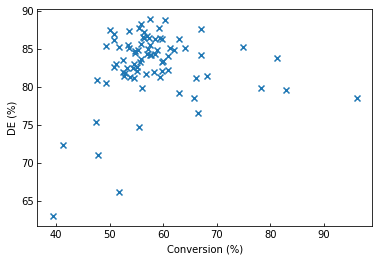

In [3]:
#Visualize all potential experiments
random_state = np.random.RandomState(1000)
all_experiments = [experiment(cas, solvent_ds_pcs, random_state) 
                   for cas in solvent_ds_pcs.index.values]
all_experiments = np.array(all_experiments)
ax = plt.subplot(111)
ax.set_xlabel('Conversion (%)'); ax.set_ylabel('DE (%)')
ax.scatter(all_experiments[:, 0], all_experiments[:, 1], marker='x')
ax.tick_params(direction='in')
plt.savefig('outputs/in_silico_experiment_space.png')
plt.savefig('outputs/in_silico_experiment_space.svg')

In [16]:
#Dsiplay best solvent in conversion and diasteromeric excess respectively
max_idx = np.argmax(all_experiments, axis=0)
solvent_ds_pcs.iloc[max_idx, :]

,stenutz_name,cosmo_name,chemical_formula,solvent_class,solvent_name,PC_1,PC_2,PC_3
cas_number,,,,,,,,
56-81-5,"1,2,3-propanetriol",glycerol,C3H8O3,Alcohol,Glycerol,5.691078,3.500596,4.144049
123-92-2,3-methylbutyl acetate,isoamylacetate,C7H14O2,Ester,Isoamyl acetate,-2.501153,1.622836,-0.238475


In [15]:
#Optimization parameters
batch_size=8
num_batches=5
num_components=3
random_seed=1000

## 1. Black-Box Optimization

In [ ]:
#TODO

## 2.Molecular Descriptors Optimization

In [14]:
descriptors_results = descriptors_optimization(batch_size=8,
                                               num_batches=5,
                                               num_components=3,
                                               random_seed=1000,
                                               save_to_disk=True)
experiments, lengthscales, log_likelihoods, loo_errors = descriptors_results

80 solvents for optimization
68.0% of variance is explained by 3 principal components.


 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-py3.6/lib/python3.6/site-packages/GPy/kern/src/stationary.py:244: RuntimeWarning:invalid value encountered in true_divide
 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-py3.6/lib/python3.6/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-py3.6/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-py3.6/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-py3.6/lib/python3.6/site-packages/GPy/kern/src/stationary.py:551: RuntimeWarning:invalid value encountered in multiply
 /Users/Kobi/Library/Caches/pypoetry/virtualenvs/summit-py3.6/lib/python3.6/site-packages/GPy/kern/src/stationary.py:554: RuntimeWarning

To hv point discarded
To hv point discarded
Random seed: 1000
Number of principal components: 3
Number of batches: 5
Batch size: 8


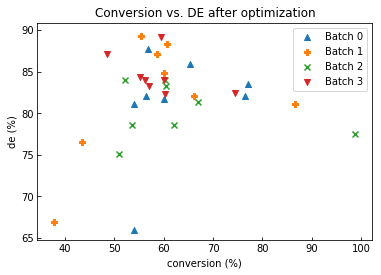

In [17]:
#Visualize the data
fig = plt.figure()
ax = plt.subplot(111)
ax.tick_params(direction='in')
markers = ['^', 'P', 'x', 'v', 'p', 'o', 's', '>', 'D', '<', '*']
for i in range(4): 
    data = experiments[experiments['batch']==float(i)].data_to_numpy()
    ax.scatter(data[:, 0], data[:, 1], marker=markers[i],label=f"Batch {i}")
ax.legend()
plt.xlabel('conversion (%)'); plt.ylabel('de (%)')
plt.title('Conversion vs. DE after optimization')
plt.savefig('outputs/solvent_optimization_molecular_descriptors.png')
plt.savefig('outputs/solvent_optimization_molecular_descriptors.svg')